In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
biomass_flux = 0.1 # kg/s
power_input_microwave = 800 # W

# output mass ratios
mass_ratio_gas = 0.5 
mass_ratio_oil = 0.25
mass_ratio_char = 0.25

# gas output, lower heating values and mass ratios
lhv_co = 2.7 # kWh/kg
lhv_h2 = 33.3 # kWh/kg
lhv_ch4 = 13.9 # kWh/kg
mass_ratio_co = 0.3
mass_ratio_h2 = 0.22
mass_ratio_ch4 = 0.2

lhv_gas = lhv_co * mass_ratio_ch4 + lhv_h2 * mass_ratio_h2 + lhv_ch4 * mass_ratio_ch4 #kWh/kg


# efficiencies
eta_chp_th = 0.62
eta_canot = 0.33
eta_chp_el = 0.28

In [60]:
# wood specific density
rho_spec_wood = 1500 # kg/m^3

# radiation exposure time
t_exp = 30 # s

# threshold power density radiation field
epsilon_field = 5 * 1E8 # W/m^3

# specimen volume kg/s * s * m^3/kg
v_specimen = biomass_flux * t_exp / rho_spec_wood #m^3

# power of radiation field
p_rad = v_specimen * epsilon_field

In [61]:
v_specimen

0.002

In [62]:
p_rad

1000000.0

In [41]:
def power_output_el(power_input_microwave,
                    mass_ratio_gas,
                    mass_ratio_oil,
                    mass_ratio_char,
                    lhv_gas,
                    eta_chp_th,
                    eta_canot,
                    eta_chp_el):
    gas_flux = biomass_flux * mass_ratio_gas # kg/s
    q_flux_chp_th = eta_chp_th * lhv_gas * gas_flux * 3600 # kW 
    p_chp_el = eta_chp_el * lhv_gas * gas_flux * 3600 # kW 

    power_output_el = eta_canot * p_chp_el # kW
    return power_output_el

In [42]:
power_out = power_output_el(power_input_microwave,
                    mass_ratio_gas,
                    mass_ratio_oil,
                    mass_ratio_char,
                    lhv_gas,
                    eta_chp_th,
                    eta_canot,
                    eta_chp_el)
print(power_out)

177.06427200000005


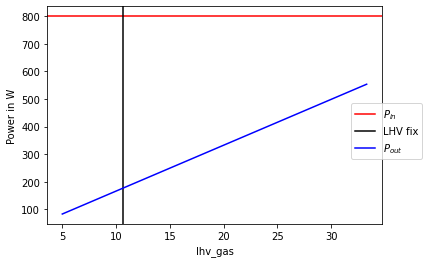

In [38]:
lhv_gas_arr = np.linspace(5, 33.3, num=50)
fig, ax = plt.subplots()

ax.axhline(power_input_microwave, color='red', label=r'$P_{in}$')
ax.axvline(lhv_gas, color='black', label=r'LHV fix')
ax.plot(lhv_gas_arr, power_output_el(power_input_microwave,
                    mass_ratio_gas,
                    mass_ratio_oil,
                    mass_ratio_char,
                    lhv_gas_arr,
                    eta_chp_th,
                    eta_canot,
                    eta_chp_el),
       color='blue',
       label=r'$P_{out}$')
ax.set_ylabel('Power in W')
ax.set_xlabel('lhv_gas')
fig.legend(loc=7)
plt.show()